<a href="https://colab.research.google.com/github/clferreira1985/Python/blob/main/SVM_estudo_de_caso/SVM_estudo_de_caso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **1º Problema de Negócio**

Usando SVM para prever a intenção de compra de usuários de e-commerce
Querendo saber se o cliente está ou não propenso a comprar produtos no seu site, para que o departamento de Marketing faça campanhas de vendas direcionadas a esses clientes.

**Fonte**
https://www.kaggle.com/datasets/imakash3011/online-shoppers-purchasing-intention-dataset

#### **2º Análise Exploratória dos Dados**

In [5]:
# Imports 
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
import sklearn
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Carrengando os dados
df = pd.read_csv('/content/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#### **3º Pré-Processamento dos dados**

In [7]:
# Shape
df.shape

(12330, 18)

In [8]:
# Tipos de dados
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [9]:
# verificar valores missing
print(df.isna().sum())

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [10]:
# removendo as linhas com valores missing
df.dropna(inplace = True)

In [11]:
print(df.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [13]:
df.shape

(12316, 18)

In [15]:
df.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

####Dividir os dados Variáves categóricas e contínuas

#### OBS.: foi observado que as colunas com menos de 30 valores distintos são categóricas

In [18]:
# preparando os dados para o plot 
df_copy = df.copy()

continuous = []
categorical = []

for c in df.columns[:-1]:
  if df_copy.nunique()[c] >= 30:
    continuous.append(c)
  else:
     categorical.append(c) 

In [29]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [24]:
df_copy[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [25]:
df_copy[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


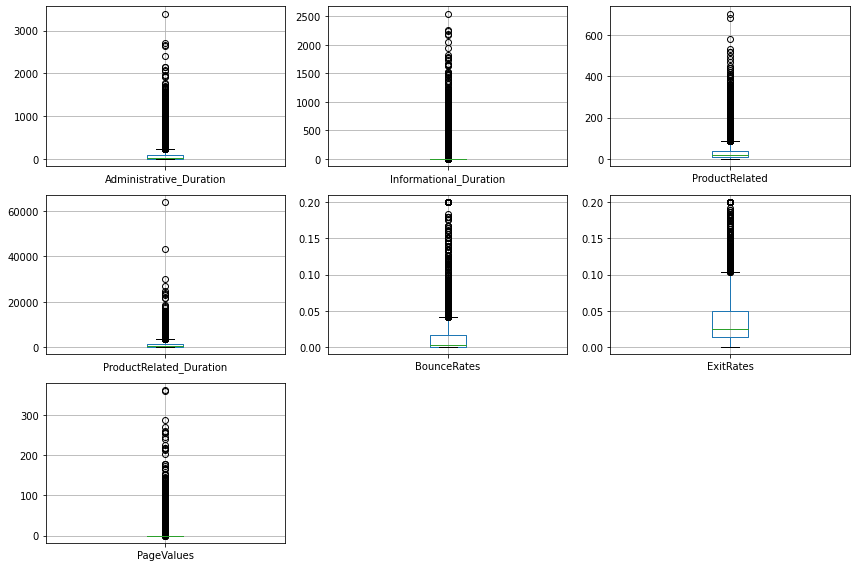

In [27]:
# Plot das variáveis continuas

# Tamanho da plotagem

fig = plt.figure(figsize = (12,8))
for i, col in enumerate(continuous):
  plt.subplot(3, 3, i + 1)
  df_copy.boxplot(col);
  plt.tight_layout()

plt.show()


Matriz de correlação entre variáveis contínuas



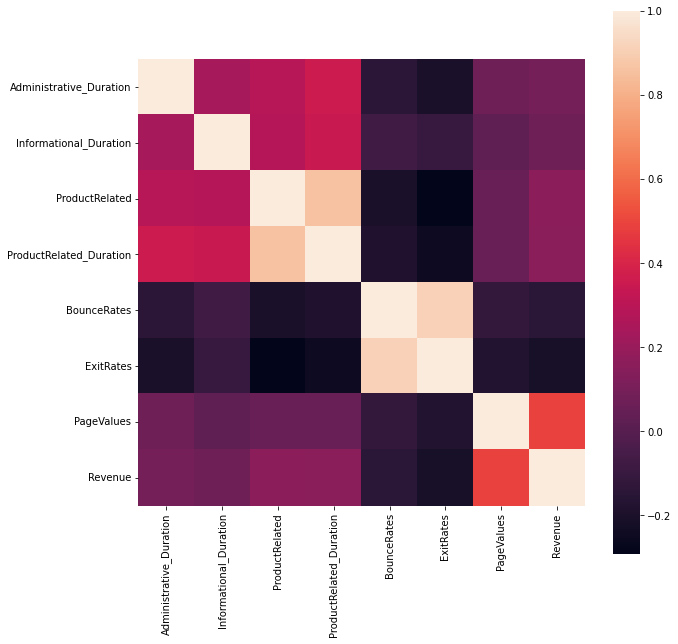

In [33]:
plt.figure(figsize = (10, 10))

sns.heatmap(df_copy[['Administrative_Duration',
                      'Informational_Duration',
                      'ProductRelated',
                      'ProductRelated_Duration',
                      'BounceRates',
                      'ExitRates',
                      'PageValues',
                      'Revenue']].corr(), vmax = 1, square = True)


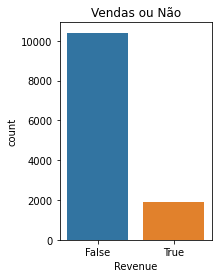

In [34]:
# Countplot vendas ou não
plt.subplot(1, 2, 2)
plt.title('Vendas ou Não')
sns.countplot(df_copy['Revenue'])

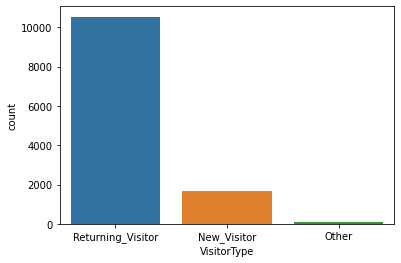

In [36]:
# Countplot Tipo de visitante
plt.xlabel("Tipo de Visitante")
sns.countplot(df_copy['VisitorType'])

#### **4º Construção da Máquina preditiva**

#### **5º Avaliação da Máquina preditiva**